# Case Study: RMS dataset analysis and visualization.


### This notebook uses a dataset provided by Maja C who studies pediatric oncology patients.

Initial cleaning from raw XLS data :cleaned 8 rows at the end. These were the following data descriptions:

Column **patol**
<ul>
<li>1=E</li>
<li>2=A</li>
<li>3=ni znano</li>
<li>4=spindle, botroid</li>
</ul>

Column **mesto**
<ul>
<li>1=H/N</li>
<li>2=parameningeal</li>
<li>3=orbita</li>
<li>4=okoncine</li>
<li>5=toraks</li>
<li>6=abdomen, pelvis, retroperitonej</li>
<li>7=bladder/prostate</li>
<li>8=testis, uterus, vagina</li>
</ul>    

Column **size**
<ul>
<li>1=favourable (A)</li>
<li>2=unfavourable (B)</li>
<li>3=ni znano</li>
</ul>

Column **meta**
<ul>
<li>1=ni meta</li>
<li>2=meta</li>
<li>3=samo pulmo</li>
</ul>

Column **bezgavke**
<ul>
<li>1=neg</li>
<li>2=poz</li>
</ul>

Column **operacija**
<ul>
<li>1=yes</li>
<li>2=no</li>
</ul>

Column **R0,1,2**
<ul>
<li>0=R0</li>
<li>1=R1</li>
<li>2=R2</li>
<li>3=R3</li>
<li>4=ni znano</li>    
</ul>

Column **RT**
<ul>
<li>1=yes</li>
<li>2=no</li>
</ul>

Column **status**
<ul>
<li>1=ziv</li>
<li>2=mrtev</li>
<li>3=toksicna smrt</li>
</ul>


Import libraries and XLS file.

In [31]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
%matplotlib inline

 
file = r'RMS_tabela_final_Copy.xls'
df = pd.read_excel(file, sheet_name='Sheet2')
df.shape

(179, 22)

The dataset has 179 rows (patients) and 22 columns (observed characteristics).

In [32]:
#Display first 10 raws of the table

df.head(10)

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,starost,patol,IRS,...,meta,bezgavke,operacija,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status
0,MB,11.0,2.0,1985.0,7.0,2.0,2000.0,14.99,2,4,...,2,2,2,NaN,1,1.0,4.0,12.0,2000.0,2.0
1,KGP,30.0,7.0,1990.0,27.0,2.0,2001.0,10.58,3,4,...,3,2,2,NaN,2,NaN,25.0,8.0,2001.0,2.0
2,KM,23.0,12.0,1993.0,9.0,5.0,2001.0,7.38,1,3,...,1,2,2,NaN,1,NaN,NaN,NaN,NaN,1.0
3,SN,20.0,9.0,1999.0,20.0,10.0,2001.0,2.08,1,4,...,2,1,1,1.0,1,2.0,8.0,1.0,2004.0,2.0
4,KK,15.0,12.0,1996.0,1.0,2.0,2002.0,5.13,1,1,...,1,1,1,0.0,2,NaN,NaN,NaN,NaN,1.0
5,ST,19.0,9.0,1986.0,5.0,8.0,2002.0,15.88,1,3,...,1,1,2,NaN,1,NaN,NaN,NaN,NaN,1.0
6,HZ,3.0,4.0,2002.0,14.0,2.0,2003.0,0.87,1,3,...,1,1,1,1.0,2,2.0,NaN,NaN,NaN,1.0
7,MM,27.0,1.0,1992.0,27.0,10.0,2003.0,11.75,1,3,...,1,1,2,NaN,1,NaN,NaN,NaN,NaN,1.0
8,ZI,6.0,11.0,1985.0,3.0,10.0,2003.0,17.91,2,3,...,1,2,2,NaN,1,2.0,24.0,5.0,2004.0,2.0
9,KK,22.0,12.0,1988.0,6.0,1.0,2005.0,16.04,4,1,...,1,2,1,1.0,1,NaN,NaN,NaN,NaN,1.0


In [33]:
df.columns

Index(['zap st', 'dan', 'mesec', 'leto roj', 'dan.1', 'mesec.1', 'leto dg',
       'starost', 'patol', 'IRS', 'mesto', 'size', 'meta', 'bezgavke',
       'operacija', 'R0,1,2', 'RT', 'RT ob relapsu', 'dan.2', 'mesec.2',
       'leto smrti', 'status'],
      dtype='object')

### Data Cleaning: Dealing with one Outlier

In [34]:
df.loc[df['starost']>18]

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,starost,patol,IRS,...,meta,bezgavke,operacija,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status
71,20,18.0,6.0,1981.0,5.0,7.0,2001.0,20.05,1,3,...,1,1,2,NaN,1,1.0,24.0,2.0,2004.0,2.0


In [35]:
df.shape

(179, 22)

Only one patient is older then 18 at the time of the diagnosis. This is an outlier (Maja Cesen Feb 18, 2019) and we will delete the record.

In [36]:
df.drop(df.index[71], inplace=True) #delete record ofr patient older > 18


In [37]:
df.loc[df['starost']>18]

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,starost,patol,IRS,...,meta,bezgavke,operacija,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status


The dataset has 178 rows (patients) and 22 columns (observed characteristics) after the cleaning.

### Age distribution at diagnosis

Text(0, 0.5, 'Frequency')

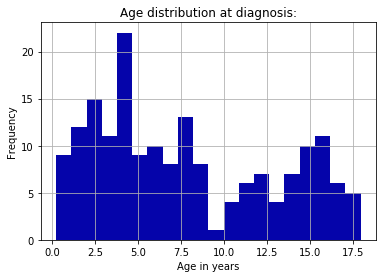

In [38]:
df.starost.hist(bins=20, rwidth=1, color='#0504aa')
plt.title('Age distribution at diagnosis:')
plt.xlabel('Age in years')
plt.ylabel('Frequency')

In [39]:
#Describe summary statistics for age (starost)
df.starost.describe()

count    178.000000
mean       7.775899
std        5.189127
min        0.250000
25%        3.495000
50%        6.450000
75%       12.352500
max       17.940000
Name: starost, dtype: float64

In [40]:
#Get the most frequent age 
df.starost.mode()

0    4.0
dtype: float64

In [41]:
#Get the median age (value at the middle of the distribution)
df.starost.median()

6.45

The distribution of age at diagnosis appears to be right skewed with different values for mean, median and mode. 
The most frequent age at diagnosis is 4. It appears that 68.27% of children in the study are diagnosed between (7.77-5.18)=2.59 and (7.77+5.18)=12.95 years of age. 

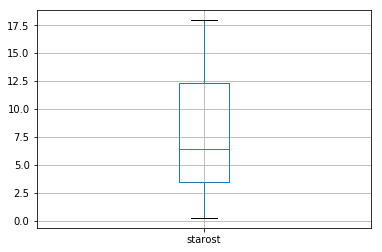

In [42]:
#show "starost" as a boxplot
df.boxplot(column="starost")

1)Zbriši 20 letnika.
Dva maksimuma za leto.

2)Histogram in statistiko za vsak parameter iz opisa.

3)
za RT=1 preštejem žive in mrtve
za RT=2 preštejem žive in mrtve
za RT=2 in "RT ob relapsu"=1 preštej žive in mrtve

4a) koliko je živih in koliko je mrtvih v množici
koliko je živih in koliko mrtvih za vsak parameter iz opisa

5) kaplan maier 



### Patol distribution 

Patol is a categorical variable. It can take the following values: 
<ul>
<li>1=E</li>
<li>2=A</li>
<li>3=ni znano</li>
<li>4=spindle, botroid</li>
</ul>

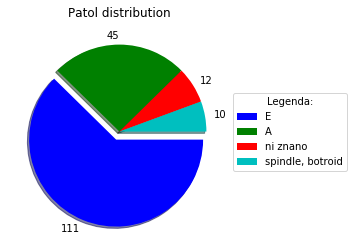

In [43]:
values = [sum(df['patol']==1), sum(df['patol']==2), sum(df['patol']==3), sum(df['patol']==4)]
colors = ['b', 'g', 'r', 'c']
labels = ['E', 'A', 'ni znano', 'spindle, botroid']
explode = (0.1, 0, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Patol distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Mesto distribution

Mesto is a categorical variable. It can take the following values:
<ul>
<li>1=H/N</li>
<li>2=parameningeal</li>
<li>3=orbita</li>
<li>4=okoncine</li>
<li>5=toraks</li>
<li>6=abdomen, pelvis, retroperitonej</li>
<li>7=bladder/prostate</li>
<li>8=testis, uterus, vagina</li>
</ul>    

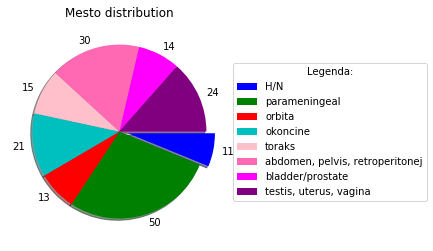

In [62]:
values = [sum(df['mesto']==1), sum(df['mesto']==2), sum(df['mesto']==3), sum(df['mesto']==4), 
         sum(df['mesto']==5), sum(df['mesto']==6), sum(df['mesto']==7), sum(df['mesto']==8)]
colors = ['b', 'g', 'r', 'c', 'pink', 'hotpink', 'magenta', 'purple']
labels = ['H/N', 'parameningeal', 'orbita', 'okoncine','toraks','abdomen, pelvis, retroperitonej',
          'bladder/prostate','testis, uterus, vagina']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Mesto distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Size distribution

Size is a categorical variable. It can take the following values:
<ul>
<li>1=favourable (A)</li>
<li>2=unfavourable (B)</li>
<li>3=ni znano</li>
</ul>  

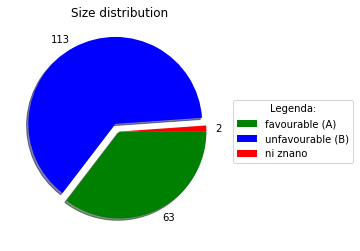

In [45]:
values = [sum(df['size']==1), sum(df['size']==2), sum(df['size']==3)]
colors = ['g', 'b', 'r']
labels = ['favourable (A)', 'unfavourable (B)', 'ni znano']
explode = (0, 0.1, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Size distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Meta distribution

Meta is a categorical variable. It can take the following values:

<ul>
<li>1=ni meta</li>
<li>2=meta</li>
<li>3=samo pulmo</li>
</ul>

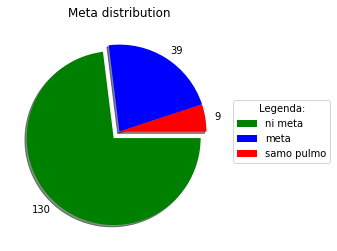

In [46]:
values = [sum(df['meta']==1), sum(df['meta']==2), sum(df['meta']==3)]
colors = ['g', 'b', 'r']
labels = ['ni meta', 'meta', 'samo pulmo']
explode = (0.1, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Meta distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Bezgavke distribution

Bezgavke is a categorical variable. It can take the following values:

<ul>
<li>1=neg</li>
<li>2=poz</li>
</ul>

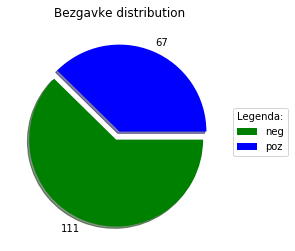

In [47]:
values = [sum(df['bezgavke']==1), sum(df['bezgavke']==2)]
colors = ['g', 'b']
labels = ['neg', 'poz']
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Bezgavke distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Operacija distribution

Operacija is a categorical variable. It can take the following values:

<ul>
<li>1=yes</li>
<li>2=no</li>
</ul>


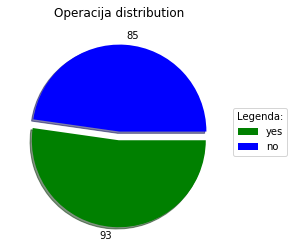

In [48]:
values = [sum(df['operacija']==1), sum(df['operacija']==2)]
colors = ['g', 'b']
labels = ['yes', 'no']
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Operacija distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### R0,1,2 distribution

R0,1,2 is a categorical variable. It can take the following values:

<ul>
<li>0=R0</li>
<li>1=R1</li>
<li>2=R2</li>
<li>3=R3</li>
<li>4=ni znano</li>    
</ul>

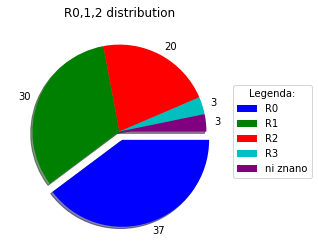

In [49]:
values = [sum(df['R0,1,2']==0), sum(df['R0,1,2']==1), sum(df['R0,1,2']==2), sum(df['R0,1,2']==3), sum(df['R0,1,2']==4)]
colors = ['b', 'g', 'r', 'c', 'purple']
labels = ['R0', 'R1', 'R2', 'R3','ni znano']
explode = (0.1, 0, 0, 0,0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('R0,1,2 distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### RT distribution

RT is a categorical variable. It can take the following values:
    
<ul>
<li>1=yes</li>
<li>2=no</li>
</ul>

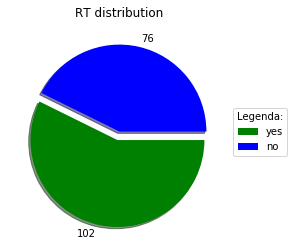

In [50]:
values = [sum(df['RT']==1), sum(df['RT']==2)]
colors = ['g', 'b']
labels = ['yes', 'no']
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('RT distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Status distribution

Status is a categorical variable. It can take the following values:

<ul>
<li>1=živ</li>
<li>2=mrtev</li>
<li>3=toksična smrt</li>
</ul>

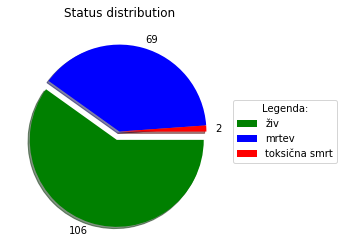

In [51]:
values = [sum(df['status']==1), sum(df['status']==2), sum(df['status']==3)]
colors = ['g', 'b', 'r']
labels = ['živ', 'mrtev', 'toksična smrt']
explode = (0.1, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Status distribution')
plt.legend(labels,title="Legenda:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Counting status "RT=2" and "RT ob relapsu=1"

In [52]:
print("Število živih za RT=2 in RT ob relapsu=1 : ", sum((df['RT']==2)&(df['RT ob relapsu']==1)&(df['status']==1)))
print("Število mrtvih za RT=2 in RT ob relapsu=1 : ", sum((df['RT']==2)&(df['RT ob relapsu']==1)&(df['status']==2)))

Število živih za RT=2 in RT ob relapsu=1 :  4
Število mrtvih za RT=2 in RT ob relapsu=1 :  7


## Counting status for patol parameters

In [53]:
print("Število živih za patol E: ", sum((df['patol']==1)&(df['status']==1)))
print("Število mrtvih za patol E: ", sum((df['patol']==1)&(df['status']==2)))
print("Število živih za patol A: ", sum((df['patol']==2)&(df['status']==1)))
print("Število mrtvih za patol A: ", sum((df['patol']==2)&(df['status']==2)))
print("Število živih za patol ni znano: ", sum((df['patol']==3)&(df['status']==1)))
print("Število mrtvih za patol ni znano: ", sum((df['patol']==3)&(df['status']==2)))
print("Število živih za patol spindle, botroid: ", sum((df['patol']==4)&(df['status']==1)))
print("Število mrtvih za patol spindle, botroid: ", sum((df['patol']==4)&(df['status']==2)))

Število živih za patol E:  67
Število mrtvih za patol E:  41
Število živih za patol A:  22
Število mrtvih za patol A:  23
Število živih za patol ni znano:  10
Število mrtvih za patol ni znano:  2
Število živih za patol spindle, botroid:  7
Število mrtvih za patol spindle, botroid:  3


## Counting status for mesto parameters

In [54]:
print("Število živih za mesto H/N: ", sum((df['mesto']==1)&(df['status']==1)))
print("Število mrtvih za mesto H/N: ", sum((df['mesto']==1)&(df['status']==2)))
print("Število živih za mesto parameningeal: ", sum((df['mesto']==2)&(df['status']==1)))
print("Število mrtvih za mesto parameningeal: ", sum((df['mesto']==2)&(df['status']==2)))
print("Število živih za mesto orbita: ", sum((df['mesto']==3)&(df['status']==1)))
print("Število mrtvih za mesto orbita: ", sum((df['mesto']==3)&(df['status']==2)))
print("Število živih za mesto okoncine: ", sum((df['mesto']==4)&(df['status']==1)))
print("Število mrtvih za mesto okoncine: ", sum((df['mesto']==4)&(df['status']==2)))
print("Število živih za mesto toraks: ", sum((df['mesto']==5)&(df['status']==1)))
print("Število mrtvih za mesto toraks: ", sum((df['mesto']==5)&(df['status']==2)))
print("Število živih za mesto abdomen, pelvis, retroperitonej: ", sum((df['mesto']==6)&(df['status']==1)))
print("Število mrtvih za mesto abdomen, pelvis, retroperitonej: ", sum((df['mesto']==6)&(df['status']==2)))
print("Število živih za mesto bladder/prostate: ", sum((df['mesto']==7)&(df['status']==1)))
print("Število mrtvih za mesto bladder/prostate: ", sum((df['mesto']==7)&(df['status']==2)))
print("Število živih za mesto testis, uterus, vagina: ", sum((df['mesto']==8)&(df['status']==1)))
print("Število mrtvih za mesto testis, uterus, vagina: ", sum((df['mesto']==8)&(df['status']==2)))

Število živih za mesto H/N:  6
Število mrtvih za mesto H/N:  5
Število živih za mesto parameningeal:  28
Število mrtvih za mesto parameningeal:  21
Število živih za mesto orbita:  10
Število mrtvih za mesto orbita:  3
Število živih za mesto okoncine:  11
Število mrtvih za mesto okoncine:  10
Število živih za mesto toraks:  5
Število mrtvih za mesto toraks:  9
Število živih za mesto abdomen, pelvis, retroperitonej:  15
Število mrtvih za mesto abdomen, pelvis, retroperitonej:  15
Število živih za mesto bladder/prostate:  13
Število mrtvih za mesto bladder/prostate:  0
Število živih za mesto testis, uterus, vagina:  18
Število mrtvih za mesto testis, uterus, vagina:  6


## Counting statuses for size parameters

In [55]:
print("Število živih za size favourable (A): ", sum((df['size']==1)&(df['status']==1)))
print("Število mrtvih za size favourable (A): ", sum((df['size']==1)&(df['status']==2)))
print("Število živih za size unfavourable (B): ", sum((df['size']==2)&(df['status']==1)))
print("Število mrtvih za size unfavourable (B)): ", sum((df['size']==2)&(df['status']==2)))
print("Število živih za ni znano: ", sum((df['size']==3)&(df['status']==1)))
print("Število mrtvih za ni znano: ", sum((df['size']==3)&(df['status']==2)))

Število živih za size favourable (A):  48
Število mrtvih za size favourable (A):  15
Število živih za size unfavourable (B):  57
Število mrtvih za size unfavourable (B)):  53
Število živih za ni znano:  1
Število mrtvih za ni znano:  1


## Counting statuses for meta parameters

In [56]:
print("Število živih za ni meta: ", sum((df['meta']==1)&(df['status']==1)))
print("Število mrtvih za ni meta: ", sum((df['meta']==1)&(df['status']==2)))
print("Število živih za meta: ", sum((df['meta']==2)&(df['status']==1)))
print("Število mrtvih za meta: ", sum((df['meta']==2)&(df['status']==2)))
print("Število živih za samo pulmo: ", sum((df['meta']==3)&(df['status']==1)))
print("Število mrtvih za samo pulmo: ", sum((df['meta']==3)&(df['status']==2)))

Število živih za ni meta:  95
Število mrtvih za ni meta:  32
Število živih za meta:  8
Število mrtvih za meta:  31
Število živih za samo pulmo:  3
Število mrtvih za samo pulmo:  6


## Counting statuses for bezgavke parameters

In [57]:
print("Število živih za bezgavke neg: ", sum((df['bezgavke']==1)&(df['status']==1)))
print("Število mrtvih za bezgavke neg: ", sum((df['bezgavke']==1)&(df['status']==2)))
print("Število živih za bezgavke poz: ", sum((df['bezgavke']==2)&(df['status']==1)))
print("Število mrtvih za bezgavke poz: ", sum((df['bezgavke']==2)&(df['status']==2)))

Število živih za bezgavke neg:  78
Število mrtvih za bezgavke neg:  31
Število živih za bezgavke poz:  28
Število mrtvih za bezgavke poz:  38


## Counting statuses for opearacija parameters

In [58]:
print("Število živih za operacija yes: ", sum((df['operacija']==1)&(df['status']==1)))
print("Število mrtvih za operacija yes: ", sum((df['operacija']==1)&(df['status']==2)))
print("Število živih za operacija no: ", sum((df['operacija']==2)&(df['status']==1)))
print("Število mrtvih za operacija no: ", sum((df['operacija']==2)&(df['status']==2)))

Število živih za operacija yes:  66
Število mrtvih za operacija yes:  27
Število živih za operacija no:  40
Število mrtvih za operacija no:  42


## Counting statuses for R0,1,2 parameters

In [59]:
print("Število živih za R0: ", sum((df['R0,1,2']==0)&(df['status']==1)))
print("Število mrtvih za R0: ", sum((df['R0,1,2']==0)&(df['status']==2)))
print("Število živih za R1: ", sum((df['R0,1,2']==1)&(df['status']==1)))
print("Število mrtvih za R1: ", sum((df['R0,1,2']==1)&(df['status']==2)))
print("Število živih za R2: ", sum((df['R0,1,2']==2)&(df['status']==1)))
print("Število mrtvih za R2: ", sum((df['R0,1,2']==2)&(df['status']==2)))
print("Število živih za R3: ", sum((df['R0,1,2']==3)&(df['status']==1)))
print("Število mrtvih za R3: ", sum((df['R0,1,2']==3)&(df['status']==2)))
print("Število živih za R ni znano: ", sum((df['R0,1,2']==4)&(df['status']==1)))
print("Število mrtvih za R ni znano: ", sum((df['R0,1,2']==4)&(df['status']==2)))

Število živih za R0:  34
Število mrtvih za R0:  3
Število živih za R1:  20
Število mrtvih za R1:  10
Število živih za R2:  10
Število mrtvih za R2:  10
Število živih za R3:  2
Število mrtvih za R3:  1
Število živih za R ni znano:  0
Število mrtvih za R ni znano:  3


## Counting statuses for RT parameters

In [60]:
print("Število živih za RT yes: ", sum((df['RT']==1)&(df['status']==1)))
print("Število mrtvih za RT yes: ", sum((df['RT']==1)&(df['status']==2)))
print("Število živih za RT no: ", sum((df['RT']==2)&(df['status']==1)))
print("Število mrtvih za RT no: ", sum((df['RT']==2)&(df['status']==2)))

Število živih za RT yes:  59
Število mrtvih za RT yes:  41
Število živih za RT no:  47
Število mrtvih za RT no:  28
